In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import os
os.chdir("/content/drive/MyDrive/code/growth")
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/ベイズ（論文2）/投稿用code/growth'

In [ ]:
import pystan
from pystan import StanModel
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
plt.rcParams['font.sans-serif'] = ['Arial'] 
from scipy import stats
import math
from matplotlib.patches import Ellipse
import pickle

In [ ]:
#import fitting result
with open('data/model-growth.pkl','rb') as f:
    model = pickle.load(f)
with open('data/result-growth.pkl','rb') as g:
    fit_nuts = pickle.load(g)

mu = fit_nuts['mu']
lag = fit_nuts['lag']

In [ ]:
#summary
#with open('summary-growth.txt','w') as g: 
    #g.write(str(fit_nuts))

In [ ]:
#correlation
def corrfunc(x, y, **kws):
    r, _ = stats.spearmanr(x,y)
    ax = plt.gca()
    ax.axis('on')
    txtcolor = 'black'
    ax.text(.5, .5, 'Corr:\n{:.2f}'.format(r), color = txtcolor, fontsize=28, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:132: UserWarning: The handle <matplotlib.patches.Patch object at 0x7f0bc977ca50> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self.fig.legend(handles, labels, **kwargs)


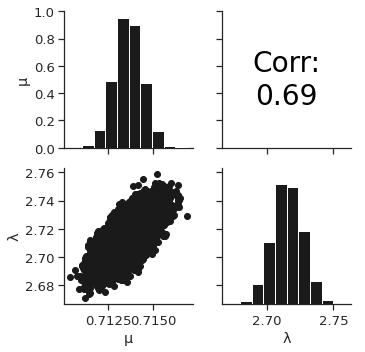

In [ ]:
#pairplot
sns.set(style='ticks', font_scale=1.2)
d = pd.DataFrame({'µ':mu, 'λ':lag},columns=['µ', 'λ'])
g = sns.PairGrid(d)
g = g.map_diag(plt.hist,color='k')
g = g.map_lower(plt.scatter,color='k')
g = g.map_upper(corrfunc)
g = g.add_legend()